In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

## Creating our own model

In [ ]:
class myGDResgressor:

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        for i in range(self.epochs):
            lose_slope = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
            self.b = self.b - (self.learning_rate * loss_slope)

    def predict(self, X_test, y_test):
        pass

In [6]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20) 

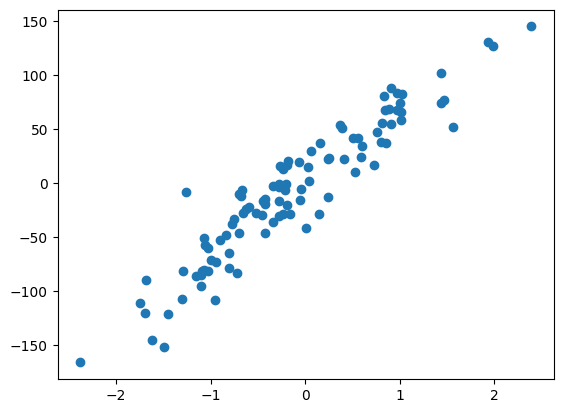

In [7]:
plt.scatter(X, y)